# Stenotexty - popis tabulek

# Parametry

# Závislosti

In [1]:
!pip install jupyter-dash -q

You should consider upgrading via the '/home/borjana/.venv/finance/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
%load_ext autoreload
%autoreload 2

# Importy

In [3]:
from datetime import timedelta, datetime

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [4]:
from snemovna.Stenotexty import *

In [5]:
st = StenoTexty(stahni=False)

2021-02-18:10:13:22 WARNING  [Snemovna.py:82] While merging 'typ_funkce' with 'typ_organu': Columns 'priorita' and 'priorita__typ_organu' differ in 129 values from 129, inconsistency ratio: 1.00
2021-02-18:10:13:22 WARNING  [Snemovna.py:88] While merging 'typ_funkce' with 'typ_organu': Dropping ['priorita'] because of big inconsistency.
2021-02-18:10:13:22 WARNING  [Snemovna.py:92] While merging 'typ_funkce' with 'typ_organu': Dropping ['priorita__typ_organu'] because of abundance.
2021-02-18:10:13:22 INFO     [PoslanciOsoby.py:90] Nastavuji začátek volebního období na: 2017.
2021-02-18:10:13:22 WARNING  [Snemovna.py:82] While merging 'funkce' with 'typ_funkce': Columns 'id_typ_org' and 'id_typ_org__typ_funkce' differ in 1 values from 2546, inconsistency ratio: 0.00
2021-02-18:10:13:22 WARNING  [Snemovna.py:82] While merging 'funkce' with 'typ_funkce': Columns 'typ_id_typ_org' and 'typ_id_typ_org__typ_funkce' differ in 1 values from 2546, inconsistency ratio: 0.00
2021-02-18:10:13:22 W

prebehlici:  Series([], dtype: int64)


In [11]:
st.meta.data.index

Index(['id_bod_stav', 'popis', 'id_bod_stav__KAT', 'id_bod', 'id_schuze',
       'id_tisk', 'id_typ', 'bod', 'uplny_naz', 'uplny_kon', 'poznamka',
       'pozvanka', 'rj', 'pozn2', 'druh_bodu', 'id_sd', 'zkratka', 'id_osoba',
       'id_org', 'typ', 'obvod', 'strana', 'id_external', 'pred', 'prijmeni',
       'jmeno', 'za', 'narozeni', 'pohlavi__ORIG', 'zmena', 'umrti', 'pohlavi',
       'id_typ_org', 'typ_id_typ_org', 'nazev_typ_org_cz', 'nazev_typ_org_en',
       'typ_org_obecny', 'priorita', 'id_typ_funkce', 'typ_funkce_cz',
       'typ_funkce_en', 'typ_funkce_obecny__ORIG', 'typ_funkce_obecny',
       'id_organ', 'organ_id_organ', 'id_typ_organu', 'nazev_organu_cz',
       'nazev_organu_en', 'od_organ', 'do_organ', 'cl_organ_base', 'id_funkce',
       'nazev_funkce_cz', 'id_of', 'cl_funkce__ORIG', 'od_o', 'do_o', 'od_f',
       'do_f', 'cl_funkce', 'id_steno', 'schuze', 'turn', 'od_steno', 'jd',
       'od_t', 'do_t', 'aname', 'druh__ORIG', 'druh', 'text',
       'text_s_poznamkami

In [12]:
df = st.df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183391 entries, 0 to 183390
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype                        
---  ------             --------------   -----                        
 0   text               183391 non-null  string                       
 1   text_s_poznamkami  183391 non-null  string                       
 2   schuze             183391 non-null  Int64                        
 3   id_rec             153059 non-null  Int64                        
 4   poznamka           17549 non-null   object                       
 5   je_poznamka        183391 non-null  bool                         
 6   cas                1366 non-null    string                       
 7   typ_casu           1366 non-null    string                       
 8   date               183391 non-null  datetime64[ns, Europe/Prague]
 9   turn_surrogate     183309 non-null  Int64                        
 10  id_rec_surrogate   183309 non-nu

In [13]:
df.head()

,text,text_s_poznamkami,schuze,id_rec,poznamka,je_poznamka,cas,typ_casu,date,turn_surrogate,...,do_t,pred,prijmeni,jmeno,za,narozeni,pohlavi__ORIG,umrti,pohlavi,zkratka
0,,(Schůze zahájena ve 13.00 hodin.),1,<NA>,[Schůze zahájena ve 13.00 hodin.],True,13:00,zahájení,2017-11-20 00:00:00+01:00,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,NaT,<NA>,<NA>
1,"Vážené paní poslankyně, vážení páni poslanci, ...","Vážené paní poslankyně, vážení páni poslanci, ...",1,1,None,False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,,Hamáček,Jan,,1978-04-11,M,NaT,muž,<NA>
2,"Prosím, abychom všichni povstali. Naše jednání...","Prosím, abychom všichni povstali. Naše jednání...",1,1,[Děje se. Zazněla státní hymna České republiky.],False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,,Hamáček,Jan,,1978-04-11,M,NaT,muž,<NA>
3,"Vážené paní poslankyně, vážení páni poslanci, ...","Vážené paní poslankyně, vážení páni poslanci, ...",1,1,None,False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,,Hamáček,Jan,,1978-04-11,M,NaT,muž,<NA>
4,Pořad ustavující schůze je dán příslušnými ust...,Pořad ustavující schůze je dán příslušnými ust...,1,1,None,False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,,Hamáček,Jan,,1978-04-11,M,NaT,muž,<NA>


druh_CAT
nezpracováno                  20
předsedající               70098
předsedající (ověřeno)       678
řečník                    107596
řečník (ověřeno)            4888
dtype: int64


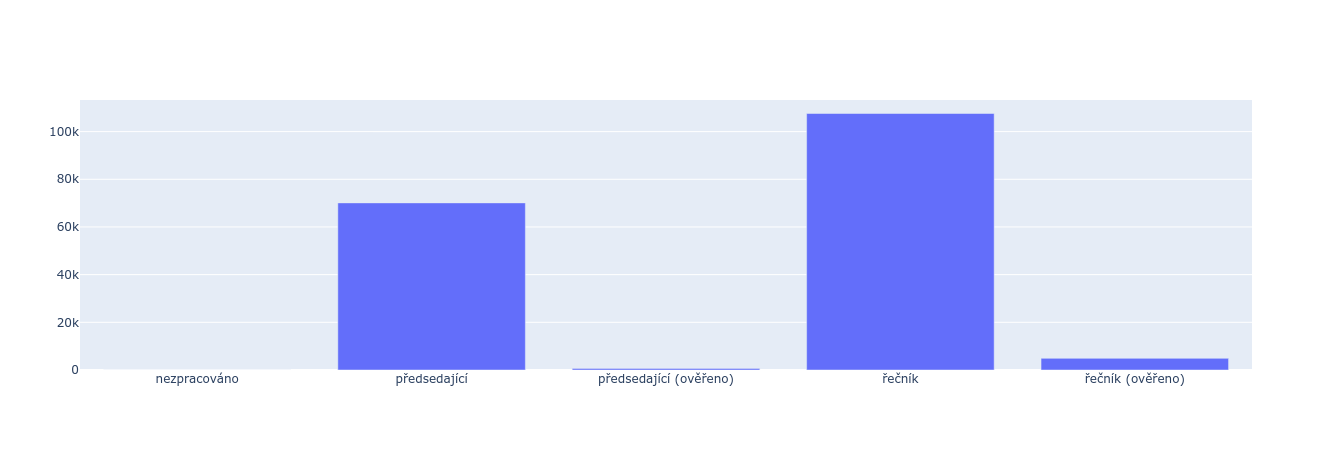

In [16]:
data = df.groupby('druh_CAT').size()
x = data.index
y=data.values
print(data)
go.Figure(go.Bar(x=x, y=y))

In [17]:
st.osoby_zarazeni

,id_osoba,id_of,cl_funkce,od_o,do_o,od_f,do_f,cl_funkce_CAT,od_o_DT,do_o_DT,...,nazev_typ_org_en,typ_org_obecny,id_funkce,id_typ_funkce,nazev_funkce_cz,priorita,typ_funkce_cz,typ_funkce_en,typ_funkce_obecny,typ_funkce_obecny_CAT
index,,,,,,,,,,,,,,,,,,,,,
0,1,15,0,1992-06-06 00,1996-06-06 00,<NA>,<NA>,členství,1992-06-06 00:00:00+02:00,1996-06-06 00:00:00+02:00,...,Political Group,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
1,1,23,0,1994-09-29 00,1996-06-06 00,<NA>,<NA>,členství,1994-09-29 00:00:00+01:00,1996-06-06 00:00:00+02:00,...,Commission,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
2,1,26,0,1995-09-27 00,1996-06-06 00,<NA>,<NA>,členství,1995-09-27 00:00:00+01:00,1996-06-06 00:00:00+02:00,...,Commission,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
3,1,35,0,1992-06-06 00,1996-06-06 00,<NA>,<NA>,členství,1992-06-06 00:00:00+02:00,1996-06-06 00:00:00+02:00,...,Committee,3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
4,1,165,0,1992-06-06 00,1996-06-06 00,<NA>,<NA>,členství,1992-06-06 00:00:00+02:00,1996-06-06 00:00:00+02:00,...,Parliament,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,6687,2235,1,2021-01-26 00,<NA>,<NA>,<NA>,funkce,2021-01-26 00:00:00+01:00,NaT,...,Committee,3,2235,7,Ověřovatel výboru,7,Ověřovatel výboru,Verifier of committee,3,ověřovatel
34851,6688,172,0,2021-01-26 14,<NA>,<NA>,<NA>,členství,2021-01-26 14:00:00+01:00,NaT,...,Parliament,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
34852,6688,1292,0,2021-01-26 14,<NA>,<NA>,<NA>,členství,2021-01-26 14:00:00+01:00,NaT,...,Political Group,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN


In [18]:
df[~df.je_poznamka & df.druh_CAT.isin(['předsedající', 'předsedající (ověřeno)'])]

,text,text_s_poznamkami,schuze,id_rec,poznamka,je_poznamka,cas,typ_casu,date,turn_surrogate,...,do_t,od_steno_DT,pred,prijmeni,jmeno,za,narozeni,pohlavi,umrti,zkratka
1,"Vážené paní poslankyně, vážení páni poslanci, ...","Vážené paní poslankyně, vážení páni poslanci, ...",1,1,None,False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,ČSSD
2,"Prosím, abychom všichni povstali. Naše jednání...","Prosím, abychom všichni povstali. Naše jednání...",1,1,[Děje se. Zazněla státní hymna České republiky.],False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,ČSSD
3,"Vážené paní poslankyně, vážení páni poslanci, ...","Vážené paní poslankyně, vážení páni poslanci, ...",1,1,None,False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,ČSSD
4,Pořad ustavující schůze je dán příslušnými ust...,Pořad ustavující schůze je dán příslušnými ust...,1,1,None,False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,ČSSD
5,Chtěl bych vás seznámit s omluvami. Omlouvá se...,Chtěl bych vás seznámit s omluvami. Omlouvá se...,1,1,None,False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,ČSSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183381,"Nyní pan poslanec Farský, pak již neeviduji da...","Nyní pan poslanec Farský, pak již neeviduji da...",82,6,None,False,<NA>,<NA>,2021-02-10 00:00:00+01:00,13,...,-1,2021-02-10 00:00:00+01:00,Bc.,Pikal,Vojtěch,,1987-02-19,M,NaT,Piráti
183383,Děkuji. Paní poslankyně Valachová s přednostní...,Děkuji. Paní poslankyně Valachová s přednostní...,82,8,None,False,<NA>,<NA>,2021-02-10 00:00:00+01:00,13,...,-1,2021-02-10 00:00:00+01:00,Bc.,Pikal,Vojtěch,,1987-02-19,M,NaT,Piráti
183386,Pan poslanec Nacher se tady hlásí. Bohužel nen...,Pan poslanec Nacher se tady hlásí. Bohužel nen...,82,10,None,False,<NA>,<NA>,2021-02-10 00:00:00+01:00,13,...,-1,2021-02-10 00:00:00+01:00,Bc.,Pikal,Vojtěch,,1987-02-19,M,NaT,Piráti
183388,Děkuji. To jsou všechny přihlášky. Takže nyní ...,Děkuji. To jsou všechny přihlášky. Takže nyní ...,82,12,None,False,<NA>,<NA>,2021-02-10 00:00:00+01:00,13,...,-1,2021-02-10 00:00:00+01:00,Bc.,Pikal,Vojtěch,,1987-02-19,M,NaT,Piráti


In [19]:
promluvy = df[(~df.je_poznamka) & df.druh_CAT.isin(['řečník', 'řečník (ověřeno)'])]
promluvy.head()

,text,text_s_poznamkami,schuze,id_rec,poznamka,je_poznamka,cas,typ_casu,date,turn_surrogate,...,do_t,od_steno_DT,pred,prijmeni,jmeno,za,narozeni,pohlavi,umrti,zkratka
15,"Vážené paní poslankyně, vážení páni poslanci -...","Vážené paní poslankyně, vážení páni poslanci -...",1,2,None,False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,2017-11-20 00:00:00+01:00,JUDr.,Filip,Vojtěch,,1955-01-13,M,NaT,KSČM
16,"""Slibuji věrnost České republice. Slibuji, že ...","""Slibuji věrnost České republice. Slibuji, že ...",1,2,[Podáním ruky a podpisem svůj slib stvrzuje.],False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,2017-11-20 00:00:00+01:00,JUDr.,Filip,Vojtěch,,1955-01-13,M,NaT,KSČM
17,"Prosím pány poslance a paní poslankyně, aby př...","Prosím pány poslance a paní poslankyně, aby př...",1,2,None,False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,2017-11-20 00:00:00+01:00,JUDr.,Filip,Vojtěch,,1955-01-13,M,NaT,KSČM
18,Pan Ivan Adamec.,Pan Ivan Adamec. (Slibuji.),1,2,[Slibuji.],False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,2017-11-20 00:00:00+01:00,JUDr.,Filip,Vojtěch,,1955-01-13,M,NaT,KSČM
19,Paní Věra Adámková.,Paní Věra Adámková. (Slibuji.),1,2,[Slibuji.],False,<NA>,<NA>,2017-11-20 00:00:00+01:00,1,...,790,2017-11-20 00:00:00+01:00,JUDr.,Filip,Vojtěch,,1955-01-13,M,NaT,KSČM


In [20]:
x = st.df[['id_osoba', 'jmeno', 'prijmeni', 'date']]
snemovna_id = st.organy[st.organy.nazev_organu_cz=="Poslanecká sněmovna"].sort_values(by="od_organ").iloc[-1].id_organ
snemovna_od = pd.to_datetime(st.organy[st.organy.id_organ == snemovna_id].iloc[0].od_organ).tz_localize("Europe/Prague")
snemovna_do = pd.to_datetime(st.organy[st.organy.id_organ == snemovna_id].iloc[0].do_organ).tz_localize("Europe/Prague")
print(snemovna_id, snemovna_od, snemovna_do)


snemovna_cond = (st.osoby_zarazeni.od_o_DT >= snemovna_od) & (st.osoby_zarazeni.nazev_typ_org_cz == "Klub") & (st.osoby_zarazeni.cl_funkce_CAT=='členství')
if pd.isnull(snemovna_do) == False:
    print('Do is not NaT!')
    snemovna_cond = snemovna_cond | (st.osoby_zarazeni.do_o_DT >= snemovna_do)

s = st.osoby_zarazeni[snemovna_cond].groupby('id_osoba').size().sort_values().tail(10)
prebehlici = s[s > 1]
prebehlici

for id_prebehlika in prebehlici.index:
    for idx, row in st.osoby_zarazeni[ snemovna_cond & (st.osoby_zarazeni.id_osoba == id_prebehlika)].iterrows():
        od, do, id_organ, zkratka =  row['od_o_DT'], row['do_o_DT'], row['id_organ'], row['zkratka']
        print(id_prebehlika, od, do, id_organ, zkratka)
        st.df.zkratka.mask((st.df.date >= od) & (st.df.date <= do) & (st.df.id_osoba == id_prebehlika), zkratka, inplace=True)
    
st.df[st.df.id_osoba == 5911].groupby('zkratka').size()

172 2017-10-21 00:00:00+02:00 NaT
6440 2017-10-26 00:00:00+02:00 2019-03-19 00:00:00+01:00 1298 SPD
6440 2019-03-19 00:00:00+01:00 NaT 1500 Nezařaz
6498 2017-10-24 00:00:00+02:00 2019-03-17 00:00:00+01:00 1295 ODS
6498 2019-03-17 00:00:00+01:00 NaT 1500 Nezařaz
6467 2017-10-24 00:00:00+02:00 2019-04-23 00:00:00+02:00 1295 ODS
6467 2019-04-23 00:00:00+02:00 NaT 1500 Nezařaz
6481 2017-10-26 00:00:00+02:00 2019-03-19 00:00:00+01:00 1298 SPD
6481 2019-03-19 00:00:00+01:00 NaT 1500 Nezařaz
6456 2017-10-26 00:00:00+02:00 2020-07-27 00:00:00+02:00 1298 SPD
6456 2020-07-27 00:00:00+02:00 NaT 1500 Nezařaz
6478 2017-10-26 00:00:00+02:00 2019-03-19 00:00:00+01:00 1298 SPD
6478 2019-03-19 00:00:00+01:00 NaT 1500 Nezařaz
346 2017-10-24 00:00:00+02:00 2017-11-20 00:00:00+01:00 1295 ODS
346 2019-07-02 00:00:00+02:00 NaT 1295 ODS
5911 2017-10-27 00:00:00+02:00 2020-02-25 00:00:00+01:00 1294 ČSSD
5911 2020-04-07 00:00:00+02:00 NaT 1298 SPD
5911 2020-02-25 00:00:00+01:00 2020-04-07 00:00:00+02:00 1500 N

zkratka
Nezařaz      6
SPD         62
ČSSD       124
dtype: int64

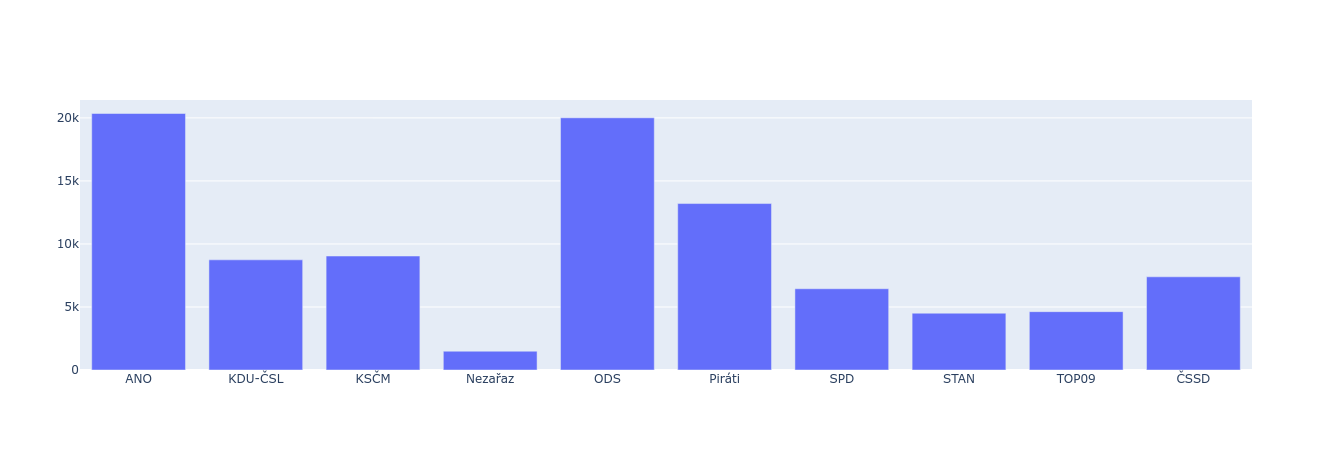

In [24]:
data = promluvy.groupby('zkratka').size()
x = data.index
y = data.values
go.Figure(go.Bar(x=x, y=y))

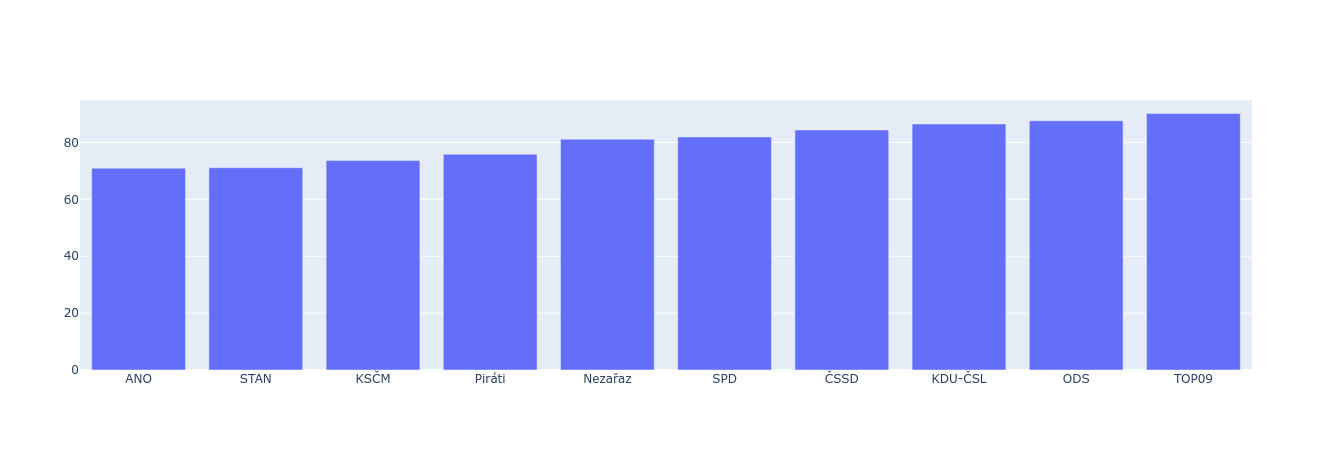

In [44]:
data = promluvy.text.str.split(' ').apply(len).groupby(promluvy.zkratka).mean().sort_values()
x = data.index
y = data.values
go.Figure(go.Bar(x=x, y=y))

In [16]:
promluvy.groupby('id_osoba').size()

id_osoba
4       1436
100       27
211        4
237        4
252      868
        ... 
6659      26
6660       9
6662     159
6683     573
6687       7
Length: 290, dtype: int64